<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/MLSysOptimization_Assignment_Group_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   CHARU MATHUR     :        2023AA05055
2.   SREERAMA GUNAVARDHAN :     2023AA05060
3.   SATYAJIT CHATTERJEE  :    2023AA05625
4.   MANO RANJAN SAHU     :    2023AA05738



In [14]:
# Generate synthetic data.
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Add x0 = 1 to each instance
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]

In [15]:
## Define the learning reate scheduling functions.
def exponential_decay(initial_lr, decay_rate, global_step):
    return initial_lr * np.exp(-decay_rate * global_step)

def step_decay(initial_lr, step_size, decay_factor, global_step):
    return initial_lr * (decay_factor ** (global_step // step_size))

In [16]:
# Training loop function
def train_model(lr_schedule_func, initial_lr, decay_param, n_iterations=100, schedule_type='exponential'):
    theta = np.random.randn(2, 1)
    lr_history = []
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        if schedule_type == 'exponential':
            lr = lr_schedule_func(initial_lr, decay_param, iteration)
        elif schedule_type == 'step':
            lr = lr_schedule_func(initial_lr, decay_param[0], decay_param[1], iteration)
        theta = theta - lr * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)

        lr_history.append(lr)
        cost_history.append(cost)

    return lr_history, cost_history, theta

In [28]:

# Parameters
initial_lr = 0.1
decay_rate = 0.2
step_size = 5
decay_factor = 0.6
n_iterations = 100

In [29]:



# Training models
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr, decay_rate, n_iterations, schedule_type='exponential')
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr, (step_size, decay_factor), n_iterations, schedule_type='step')

# Training with fixed learning rate for comparison
theta_fixed = np.random.randn(2, 1)
lr_fixed = initial_lr
cost_history_fixed = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_fixed) - y)
    theta_fixed = theta_fixed - lr_fixed * gradients
    cost = (1/m) * np.sum((X_b.dot(theta_fixed) - y) ** 2)

    cost_history_fixed.append(cost)



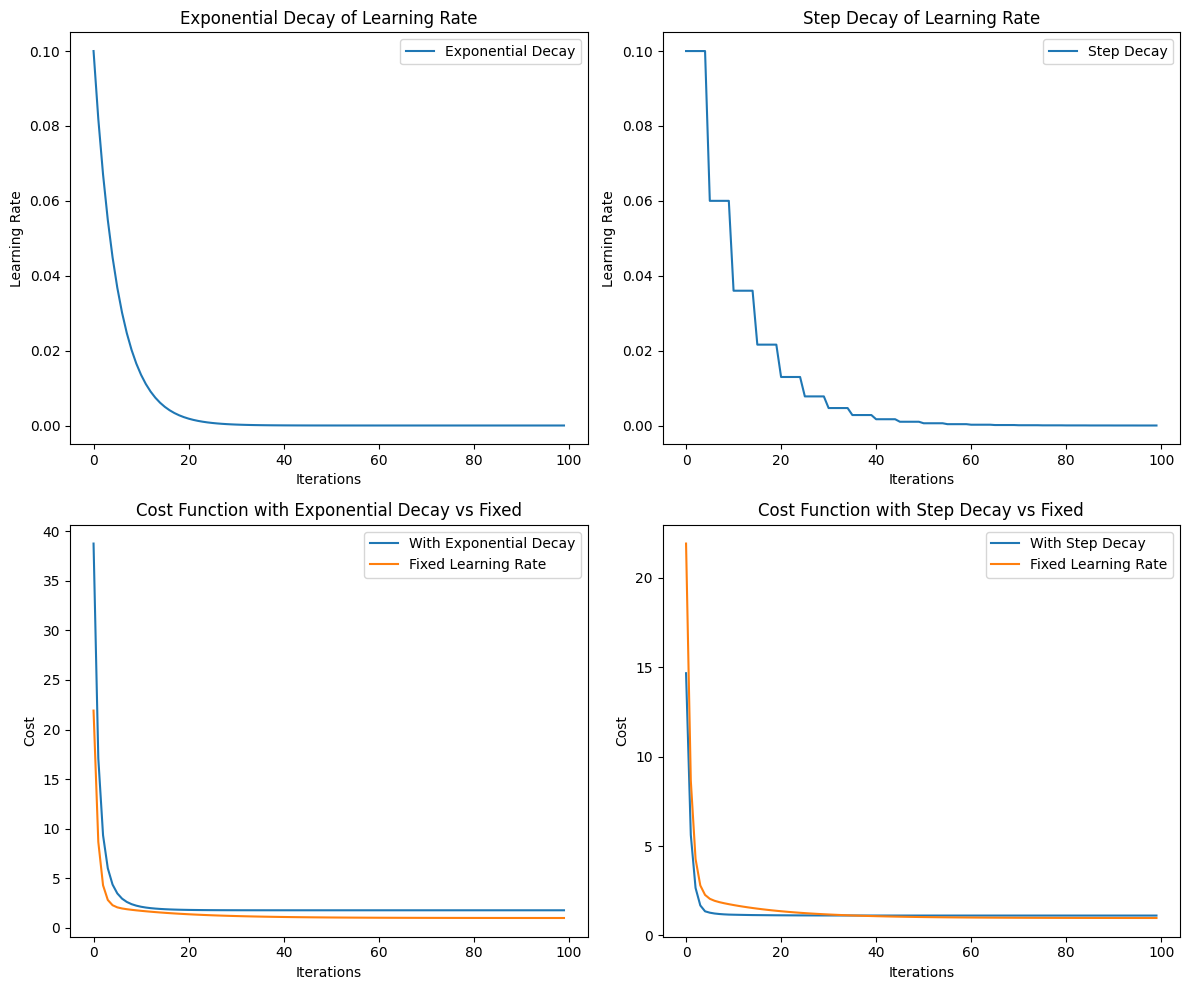

In [30]:
# Plotting the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(lr_history_exp, label='Exponential Decay')
plt.xlabel('Iterations')
plt.ylabel('Learning Rate')
plt.title('Exponential Decay of Learning Rate')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lr_history_step, label='Step Decay')
plt.xlabel('Iterations')
plt.ylabel('Learning Rate')
plt.title('Step Decay of Learning Rate')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(cost_history_exp, label='With Exponential Decay')
plt.plot(cost_history_fixed, label='Fixed Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function with Exponential Decay vs Fixed')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(cost_history_step, label='With Step Decay')
plt.plot(cost_history_fixed, label='Fixed Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function with Step Decay vs Fixed')
plt.legend()

plt.tight_layout()
plt.show()


To ensure better convergence with learning rate scheduling, we can fine-tune the parameters of the scheduling techniques. The following are few guidelines: Adjust Initial Learning Rate: Sometimes a lower or higher initial learning rate can significantly affect the training performance. Modify Decay Rate: The decay rate for exponential decay might be too high or too low, affecting convergence.Change Step Size and Decay Factor: For step decay, the step size and decay factor need to be balanced to ensure the learning rate is neither decreasing too quickly nor too slowly.